States
Maharashtra                    15525.0
Gujarat                         6245.0
Delhi                           5104.0
Tamil Nadu                      4058.0
Rajasthan                       3158.0
Madhya Pradesh                  3049.0
Uttar Pradesh                   2880.0
Andhra Pradesh                  1717.0
Punjab                          1451.0
Telengana                       1096.0
Jammu and Kashmir                741.0
Karnataka                        671.0
Haryana                          548.0
Bihar                            536.0
Kerala                           502.0
Odisha                           175.0
Jharkhand                        125.0
Chandigarh                       111.0
Uttarakhand                       61.0
Chhattisgarh                      59.0
Assam                             43.0
Tripura                           43.0
Himachal Pradesh                  42.0
Ladakh                            41.0
Andaman and Nicobar Islands       33.0
Meghalaya         

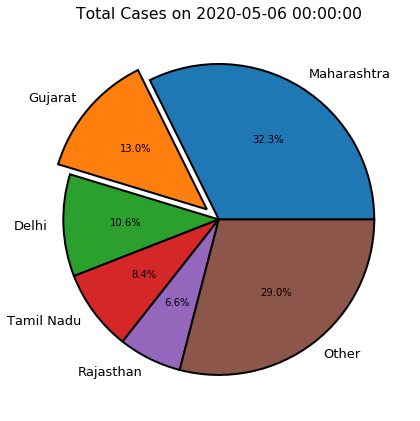

In [5]:
from matplotlib import pyplot as plt
import pandas as pd

df = pd.read_csv('COVID19INDIA.csv')
df['Date'] = pd.to_datetime(df['Date'])

unique_states = df['States'].unique()
plt.style.use("seaborn-talk")


# Get last date to see which states have the most cases currently
last_date = df['Date'].max()
df_last_date = df[df['Date'] == last_date]
series_last_date = df_last_date.groupby('States')['Total Cases'].sum().sort_values(ascending=False)
print(series_last_date)

labels = []
values = []
state_count = 5
other_total = 0
for state in series_last_date.index:
    if state_count > 0:
        labels.append(state)
        values.append(series_last_date[state])
        state_count -= 1
    else:
        other_total += series_last_date[state]
labels.append("Other")
values.append(other_total)

wedge_dict = {
    'edgecolor': 'black',
    'linewidth': 2        
}

explode = (0, 0.1, 0, 0, 0, 0)

plt.title(f"Total Cases on {last_date}")
plt.pie(values, labels=labels, explode=explode, autopct='%1.1f%%', wedgeprops=wedge_dict)
plt.show()